In [ ]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Vectorize the text data using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train.data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, newsgroups_train.target, test_size=0.25, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=newsgroups_train.target_names))


                        precision    recall  f1-score   support

           alt.atheism       0.98      0.94      0.96       107
         comp.graphics       0.93      1.00      0.96       140
               sci.med       0.99      0.96      0.97       161
soc.religion.christian       0.97      0.96      0.96       157

              accuracy                           0.96       565
             macro avg       0.97      0.96      0.96       565
          weighted avg       0.97      0.96      0.96       565



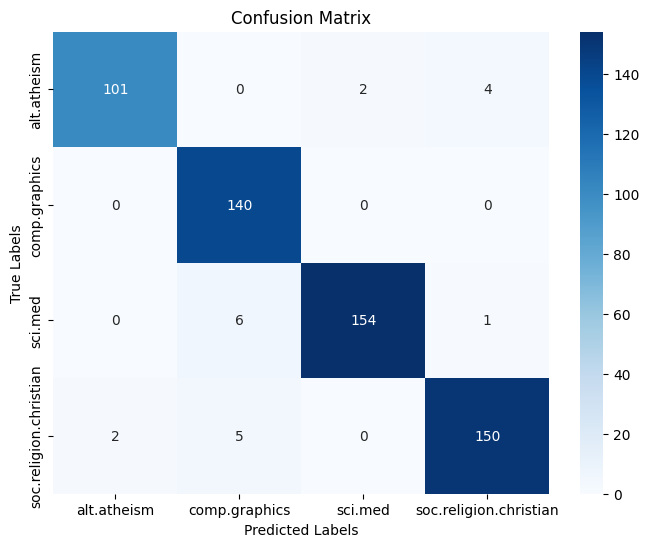

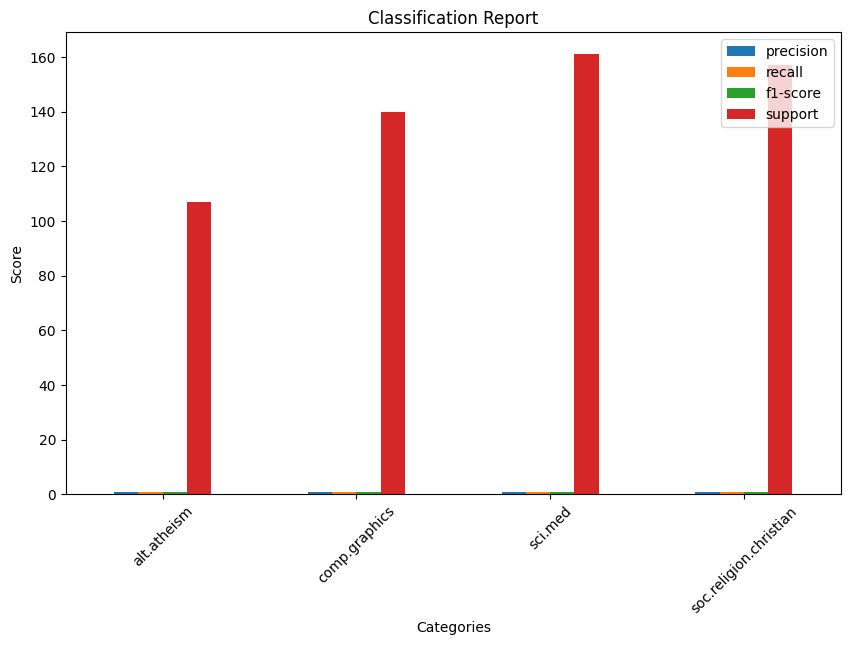

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot classification report
report = classification_report(y_test, y_pred, target_names=newsgroups_train.target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Categories')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


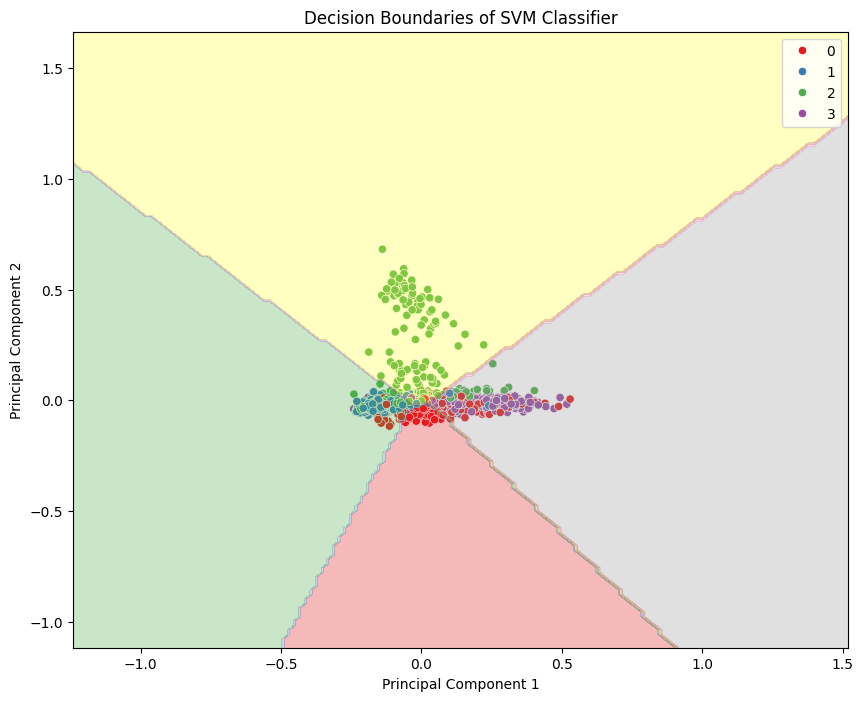

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

# Fit SVM classifier on reduced data
svm_classifier.fit(X_train_pca, y_train)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of SVM Classifier')
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.show()
